In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
plt.rcParams["figure.figsize"] = (9,6)

# Croston's method

In [4]:
df = pd.read_csv('data/intermittent_time_series.csv')

df.head()

,unique_id,ds,y
0,1,2023-01-01 00:00:00,43
1,1,2023-01-01 01:00:00,87
2,1,2023-01-01 02:00:00,89
3,1,2023-01-01 03:00:00,87
4,1,2023-01-01 04:00:00,73


In [6]:
from statsforecast import StatsForecast
from statsforecast.models import CrostonClassic

models = [CrostonClassic()]

sf = StatsForecast(
    df=df,
    models=models,
    freq='H',
    n_jobs=-1
)

cv_df = sf.cross_validation(
    df=df,
    h=1,
    step_size=1,
    n_windows=50
)

cv_df.index = np.arange(50, 100, 1)

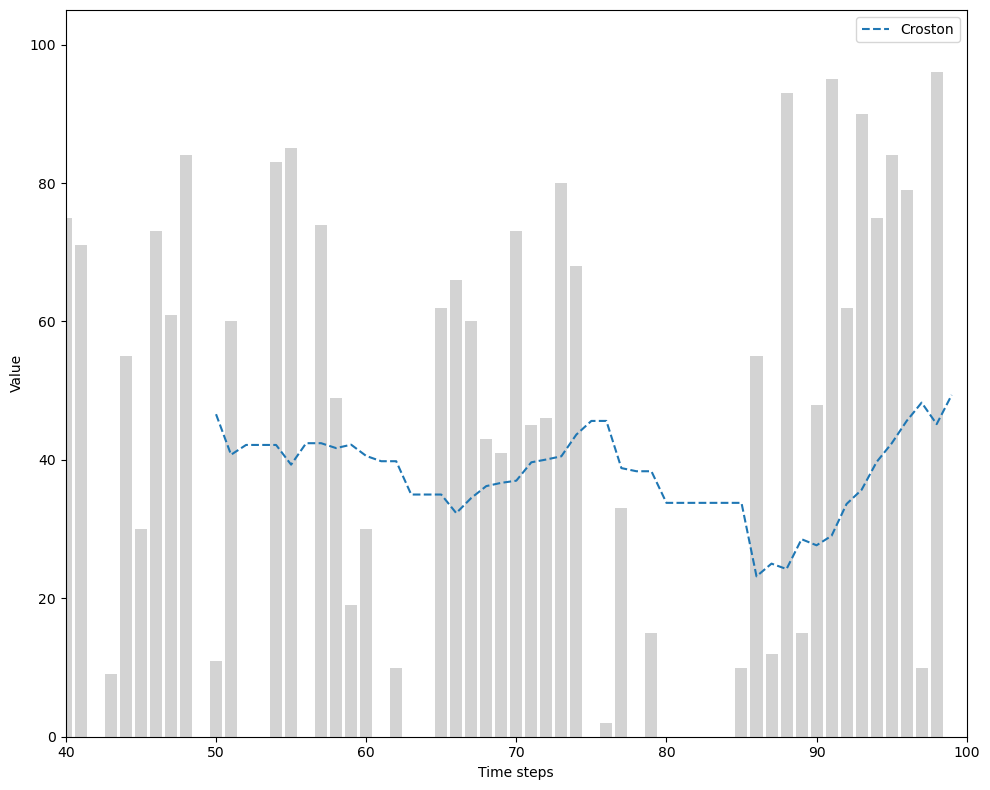

In [8]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(df.index, df['y'], color='lightgray')
ax.plot(cv_df.index, cv_df['CrostonClassic'], ls='--', label='Croston')
ax.set_ylabel('Value')
ax.set_xlabel('Time steps')
ax.legend(loc='best')
plt.xlim(40, 100)

plt.tight_layout()

## Optimized Croston's Method 

In [10]:
from statsforecast.models import CrostonOptimized

models = [CrostonOptimized()]

sf = StatsForecast(
    df=df,
    models=models,
    freq='H',
    n_jobs=-1
)

cv_df = sf.cross_validation(
    df=df,
    h=1,
    step_size=1,
    n_windows=50
)

cv_df.index = np.arange(50, 100, 1)

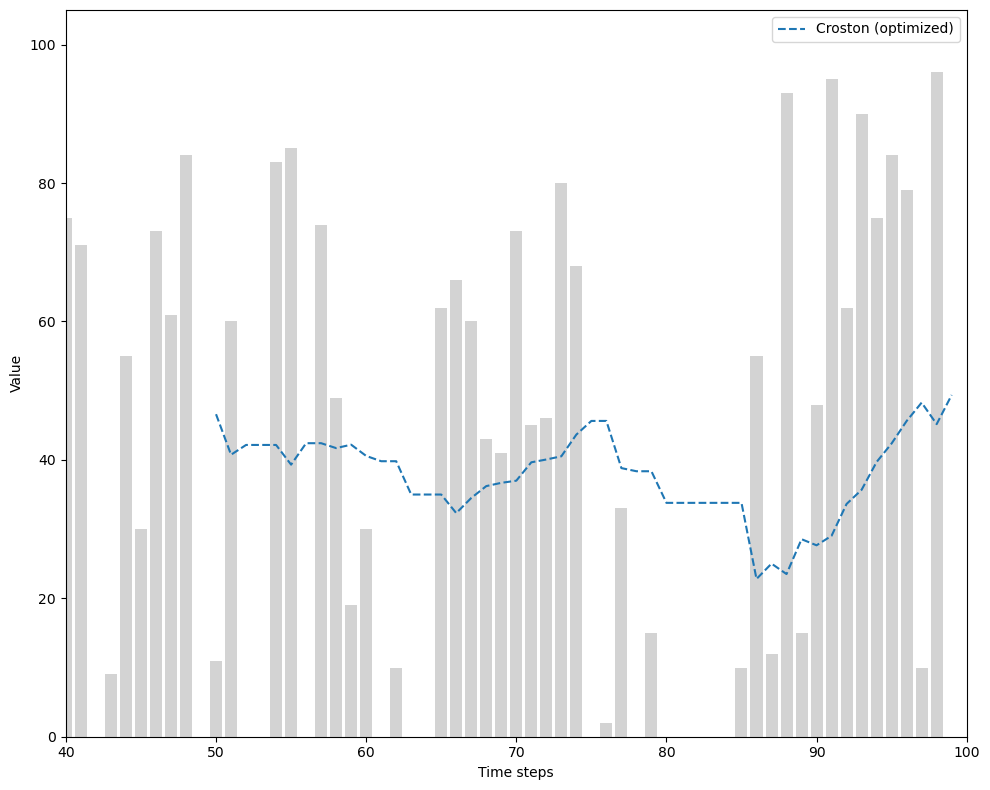

In [11]:
fig, ax = plt.subplots(figsize=(10,8))

ax.bar(df.index, df['y'], color='lightgray')
ax.plot(cv_df.index, cv_df['CrostonOptimized'], ls='--', label='Croston (optimized)')
ax.set_ylabel('Value')
ax.set_xlabel('Time steps')
ax.legend(loc='best')
plt.xlim(40, 100)

plt.tight_layout()